# Data Scientist Nanodegree/ Udacity








# <center> Crime in Vancouver (Canada) 2003-2017 </center>


<img src="https://i.cbc.ca/1.4429974.1533063033!/fileImage/httpImage/image.jpg_gen/derivatives/16x9_780/stock-vancouver-police-department-vpd-cruiser-traffic-stop-crime-liquor-laws.jpg" width="500" height="300">





# Business Understanding

### Crimes in Vancouver have become a very serious issue, it can be seen that the crimes rate in Vancouver has slightly increased in the past three years, so in this project we are going to investigate and analyses the dataset crims in Vancouver(Canada) between 2003 to 2017 which to find the reasons for committing these crimes, and to try to find a solution.


### __I am going to perform a consideration on crims in Vancouver Dataset from Kaggle__.

### In order to analyse the dataset I have come up with some questions which seem are important in this project:


### __Questions__                  
#### __Q1/Which year has the highest crime rate in Vancouver?__
 #### __Q2/What is the most committed type of crime between year 2003 to 2017? What is the correlation between the type of crime and Time?__ 
#### __Q3/Find the corrleation between the type of crime and Time?__

________________________________________________________________________________________________________________________________

## Columns description:

| __Column name__ | __Description__  |
|-------------|---------------|
|-------------|---------------|
|   TYPE  | Type of Crime|
|   YEAR | Year when the reported crime activity occurred|
|   MONTH  | Month when the reported crime activity occurred|
|   DAY  | Day when the reported crime activity occurred|
|   HOUR  | Hour when the reported crime activity occurred|
|   MINUTE  | Minute when the reported crime activity occurred|
|   HUNDRED_BLOCK  | Generalized location of the report crime activity|
|   NEIGHBOURHOOD | Neighbourhood where the reported crime activity occurred|
|   X | Coordinate values projected in UTM Zone 10|
|   Y | Coordinate values projected in UTM Zone 10|
|   Latitude | Coordinate values converted to Latitude|
|   Longitude| Coordinate values converted to Longitude|

In [1]:
# imported the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

##### This project will be using dataset from Kaggle and in this section we will understand this data

In [9]:
# Load dataset
df=pd.read_csv('crime.csv')

In [13]:
def Data_understanding():
    
    ' This function can only use to read the dataset and getting information about the dataset where are working with'
    #print the top 30 rows 
    print('\n\nExplaring the dataframe:\n\n',df.head(31))
    
    # getting the basic information about this data
    print('\n\nThe dataset describtion is:\n\n',df.describe())
    
    # counting the number of rows and columns
    number_of_rows= df.shape[0]
    number_of_columns=df.shape[1]
    print('\n\nThe number of rows:\n\n',number_of_rows)
    print('\n\nThe number of columns:\n\n',number_of_columns)
    
    # Getting information about the coulmns 
    print('\n\nColumn_Names:\n\n',df.columns)
    
    return Data_understanding   

In [14]:
# To get information about the dataset
Data_understanding() 



Explaring the dataframe:

                                  TYPE  YEAR  MONTH  DAY  HOUR  MINUTE  \
0                         Other Theft  2003      5   12  16.0    15.0   
1                         Other Theft  2003      5    7  15.0    20.0   
2                         Other Theft  2003      4   23  16.0    40.0   
3                         Other Theft  2003      4   20  11.0    15.0   
4                         Other Theft  2003      4   12  17.0    45.0   
5                         Other Theft  2003      3   26  20.0    45.0   
6   Break and Enter Residential/Other  2003      3   10  12.0     0.0   
7                            Mischief  2003      6   28   4.0    13.0   
8                         Other Theft  2003      2   16   9.0     2.0   
9   Break and Enter Residential/Other  2003      7    9  18.0    15.0   
10                        Other Theft  2003      1   31  19.0    45.0   
11                           Mischief  2003      9   27   1.0     0.0   
12  Break and Enter Re

<function __main__.Data_understanding()>

In [15]:
# changing the data type to categorical 
for col in ['TYPE','NEIGHBOURHOOD','HUNDRED_BLOCK']:
    df[col] = df[col].astype('category')

## Prepare Data

In this section, some preparation steps will be performed which can help to answer all the questions before using the dataset:
#### 1- Searching for missing values in each column 
#### 2- Fillin all the missing values 
#### 3- Drop unwanted columns 
#### 3- Using the one-Hot-Encoding method to deal with categorical data such as TYPE, NEIGHBOURHOOD

In [16]:
# Checking the missing values 
df.isnull().sum()

TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR             54362
MINUTE           54362
HUNDRED_BLOCK       13
NEIGHBOURHOOD    56624
X                    0
Y                    0
Latitude             0
Longitude            0
dtype: int64

### After checking the missing values which show only exist in column  "HOUR" & "MINUTE", "NEIGHBOURHOOD" & "HUNDRED_BLOCK".  My understanding is that missing values in the columns which nan-values is that these nan-values mean many crimes are not reported correctly with location and time, Thus it's a better idea to use zero to fill in these missing values.

In [17]:
# Finding the number of Missing vlaues 
missing_values=df.isnull().sum()
missing= missing_values.sum()
print('The number of missing values is',missing)

The number of missing values is 165361


In [18]:
 #Fillin all the missing values with zero 
df = df.fillna(df.mode().iloc[0])

In [19]:
# Finding the number of Missing vlaues 
missing_values=df.isnull().sum()
missing= missing_values.sum()
print('The number of missing values is',missing)

The number of missing values is 0


In [20]:
# drop unwanted columns 

columns_un_used=['X', 'Y', 'Latitude','MINUTE','HUNDRED_BLOCK', 'Longitude']
df.drop(axis=0,columns=columns_un_used,inplace=True)

In [21]:
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD
0,Other Theft,2003,5,12,16.0,Strathcona
1,Other Theft,2003,5,7,15.0,Strathcona
2,Other Theft,2003,4,23,16.0,Strathcona
3,Other Theft,2003,4,20,11.0,Strathcona
4,Other Theft,2003,4,12,17.0,Strathcona


In [22]:
#Using the one-Hot-Encoding method to deal with categorical data and convert it to numerical varibles
label = LabelEncoder()  
df['NEIGHBOURHOOD']= label.fit_transform(df['NEIGHBOURHOOD'].astype('category'))
df

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD
0,Other Theft,2003,5,12,16.0,19
1,Other Theft,2003,5,7,15.0,19
2,Other Theft,2003,4,23,16.0,19
3,Other Theft,2003,4,20,11.0,19
4,Other Theft,2003,4,12,17.0,19
5,Other Theft,2003,3,26,20.0,19
6,Break and Enter Residential/Other,2003,3,10,12.0,7
7,Mischief,2003,6,28,4.0,2
8,Other Theft,2003,2,16,9.0,19
9,Break and Enter Residential/Other,2003,7,9,18.0,4


# Answer Questions base on dataset

In [23]:
## Q1/Which year has the highest crime rate in Vancouver?


# check the most frequent values in the YEAR column 

df_check=df['YEAR'].value_counts().idxmax()
print('The Highest Crime rate was in',df_check)

The Highest Crime rate was in 2003


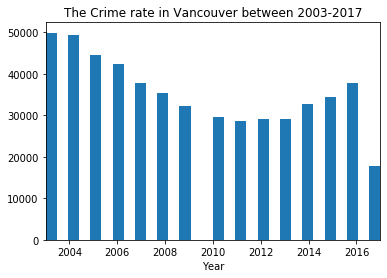

In [24]:
# plotting histogram
plt.hist(df.YEAR,bins=30)
plt.xlim(xmin=2003, xmax = 2017)
plt.title('The Crime rate in Vancouver between 2003-2017')
plt.xlabel('Year')
plt.show()

### As we can see above the highest year of committing crimes in Vancouver was in 2003 and 2004

In [25]:
# Q2/What is the most committed type of crime between year 2003 to 2017? What is the corrleation between the type of crime and Time?



# counting the most frequent type of crime
df_check=df['TYPE'].value_counts().idxmax()
print('the most committed type of crime is',df_check)

the most committed type of crime is Theft from Vehicle


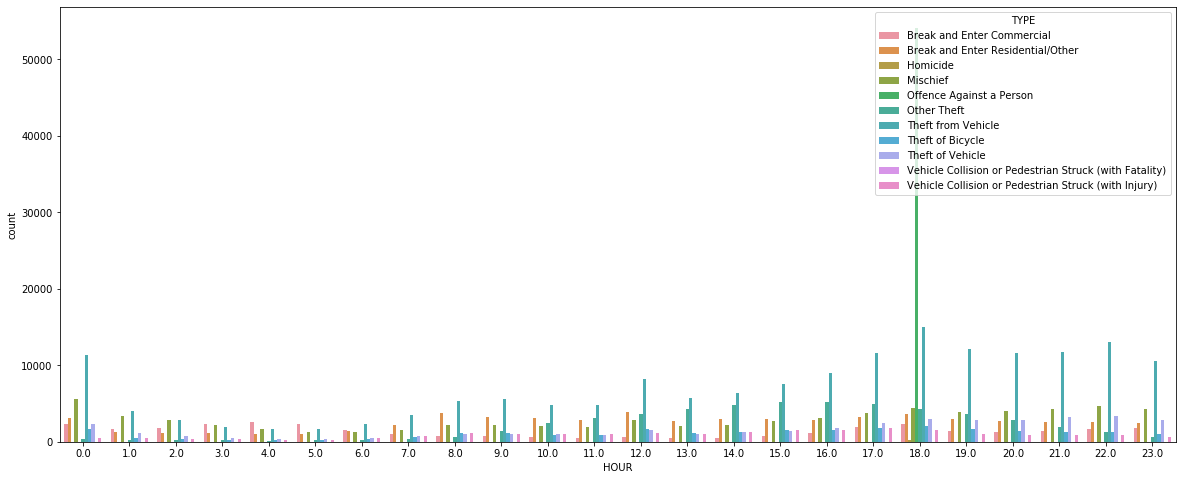

In [26]:
# plotting a graph
plt.figure(figsize = (20,8))
sns.countplot(df['HOUR'],hue=df['TYPE'])

##  As we can see above Theft from Vehicle is the common crime in Vancouver which has the highest rate between the year 2003 until 2017.
## From the chart above It can be seen that Theft from vehicle increased in the evening starting from 6 pm until late at night. On the other hand, in the morning it seems that there wasn't a lot of crimes, I think that because most of the stores open early. So there is no chance for a criminal to steal between those hours. 

findfont: Font family ['Console'] not found. Falling back to DejaVu Sans.


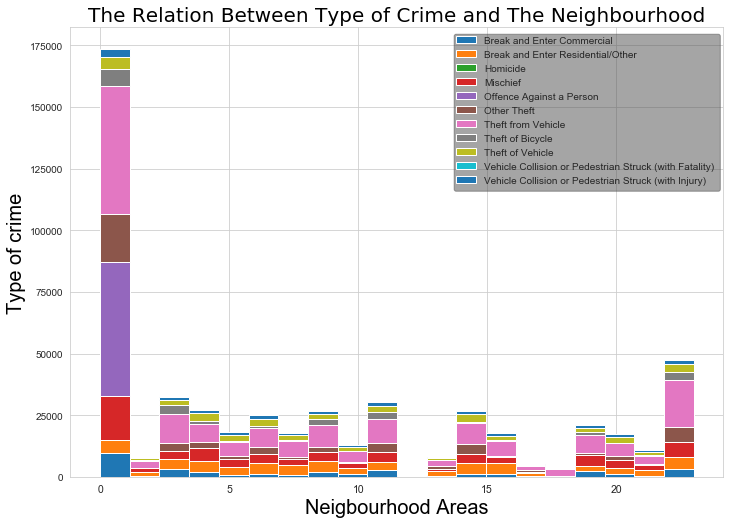

In [27]:
# Q3/ What the relation between the type of crime and the neighborhood that has a high rate of crimes?

list1=list()
mylist=list()
for ii in df.TYPE.cat.categories:
    list1.append(df[df.TYPE==ii].NEIGHBOURHOOD)
    mylist.append(ii)
sns.set_style('whitegrid') 
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)   
plt.title('The Relation Between Type of Crime and The Neighbourhood' , fontsize=20, color='Black',fontname='Console')
plt.ylabel('Type of crime',fontsize=20,color='Black') 
plt.xlabel('Neigbourhood Areas',fontsize=20,color='Black')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10.5)
h=plt.hist(list1,stacked=True, bins=20, rwidth=1,label=mylist)
plt.legend(frameon=True,fancybox=True,shadow=True,framealpha=0 ,fontsize=10)
plt.show()

## From the chart, we can see that neighborhood 0 which represents Arbutus Ridge and neighborhood 1 which represent Central Business District have the most crime rate which means these areas should be check by the police because it has a high crime rate comparing with another neighborhood which seems it has a low crime rate, As well as Theft from vehicle and theft of the vehicle,  are the most committed crimes in these areas.

# In conclusion,

### Despite the fact that Vancouver has become the safest place to visit, the crime rate is slightly increased. To reduce the number of crimes, the relevant institutions in the region should increase CCTV cameras, particularly in areas that have a high crime rate.


## Reference:
#### 1- https://medium.com/@wise_plum_macaw_832/crime-in-vancouver-canada-2003-2017-e5ece4ec3080 (Blog-post)
#### 2-https://www.kaggle.com/wosaku/crime-in-vancouver
